# Import and become one with the data

## Import the data

In [ ]:
import zipfile

# Download zip file of 10_food_classes images
# See how this data was created - https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2024-04-24 06:15:00--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.63.207, 142.250.31.207, 142.251.111.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.63.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  53.4MB/s    in 7.0s    

2024-04-24 06:15:07 (70.6 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



## EDA

In [ ]:
# walk through 10 classes of food image data
import numpy as np
import tensorflow as tf
import pandas as pd
import os

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 0 images in '10_food_classes_all_data'
There are 10 directories and 0 images in '10_food_classes_all_data/train'
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'
There are 1

In [ ]:
# setup the train and test directories

train_dir = "/content/10_food_classes_all_data/train/"
test_dir = "/content/10_food_classes_all_data/test/"

In [ ]:
# Let's get some class names

import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names_1 = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names_1

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 384, 3)


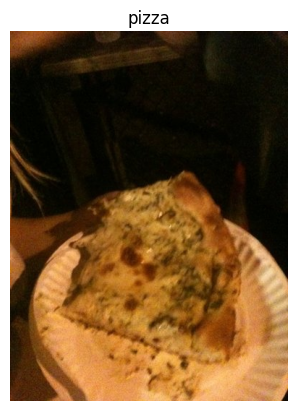

In [ ]:
# Visualise , visualise , visualise

import random
img = view_random_image(target_dir = train_dir,
                        target_class = random.choice(class_names_1))

In [ ]:
# Plot 4 random images from a particular class


def view_random_images(target_dir, target_class, num_images=4):
    # Setup target directory (we'll view images from here)
    target_folder = os.path.join(target_dir, target_class)

    # Get a list of all image paths in the target folder
    image_paths = [os.path.join(target_folder, img) for img in os.listdir(target_folder)]

    # Randomly select num_images images
    random_images = random.sample(image_paths, num_images)

    # Plot the images
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

    for i, image_path in enumerate(random_images):
        img = mpimg.imread(image_path)
        axes[i].imshow(img)
        axes[i].set_title(target_class)
        axes[i].axis("off")
        print(f"Image shape: {img.shape}")  # Show the shape of the image

    plt.show()


Image shape: (384, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


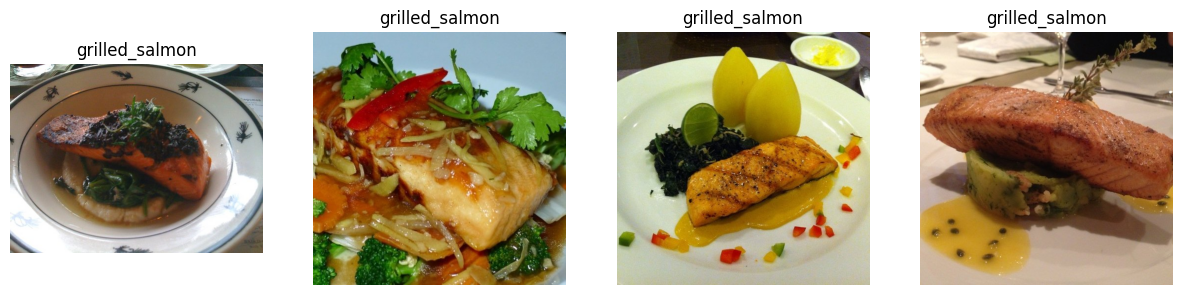

In [ ]:
# Visualise , visualise , visualise

import random
img = view_random_images(target_dir = train_dir,
                        target_class = random.choice(class_names_1))

# Preprocess the data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen  = ImageDataGenerator(rescale= 1/255.)

#Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224,224),
                                               batch_size= 32 ,
                                               class_mode = "categorical")

test_data = test_datagen.flow_from_directory(test_dir ,
                                             target_size =(224,224),
                                             batch_size = 32,
                                             class_mode = "categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


# Model Experiments

## Expt 1 : Baseline Model

In [ ]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPool2D, Flatten, Dense

# Create our model
tf.random.set_seed(42)

model_1 = Sequential ([
    Conv2D(10,3, activation = "relu", input_shape = (224,224,3)),
    Conv2D(10,3, activation = "relu"),
    MaxPool2D(),
    Conv2D(10,3, activation = "relu"),
    Conv2D(10,3, activation = "relu"),
    MaxPool2D(),
    Conv2D(10,3, activation = "relu"),
    Conv2D(10,3, activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation = "softmax"),# changed to have 10 output neurons and use the softmax activation function

])

# Compile the model

model_1.compile (loss = "categorical_crossentropy",
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])



In [ ]:
#   Fit a model
history_1 = model_1.fit(train_data,
                        epochs = 50,
                        steps_per_epoch = len (train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/50
235/235 [==============================] - 31s 125ms/step - loss: 2.1509 - accuracy: 0.2061 - val_loss: 2.0608 - val_accuracy: 0.2576
Epoch 2/50
235/235 [==============================] - 29s 124ms/step - loss: 1.9424 - accuracy: 0.3235 - val_loss: 1.9174 - val_accuracy: 0.3352
Epoch 3/50
235/235 [==============================] - 29s 121ms/step - loss: 1.7703 - accuracy: 0.3943 - val_loss: 1.8711 - val_accuracy: 0.3576
Epoch 4/50
235/235 [==============================] - 28s 117ms/step - loss: 1.5973 - accuracy: 0.4613 - val_loss: 1.9473 - val_accuracy: 0.3256
Epoch 5/50
235/235 [==============================] - 29s 124ms/step - loss: 1.3768 - accuracy: 0.5332 - val_loss: 2.1182 - val_accuracy: 0.3300
Epoch 6/50
235/235 [==============================] - 30s 126ms/step - loss: 1.1311 - accuracy: 0.6171 - val_loss: 2.3044 - val_accuracy: 0.3188
Epoch 7/50
235/235 [==============================] - 31s 133ms/step - loss: 0.8857 - accuracy: 0.7044 - val_loss: 2.5990 - val_ac

In [ ]:
# Evaluate the model

model_1.evaluate(test_data)

79/79 [==============================] - 6s 81ms/step - loss: 12.7290 - accuracy: 0.2552


[12.72895336151123, 0.25519999861717224]

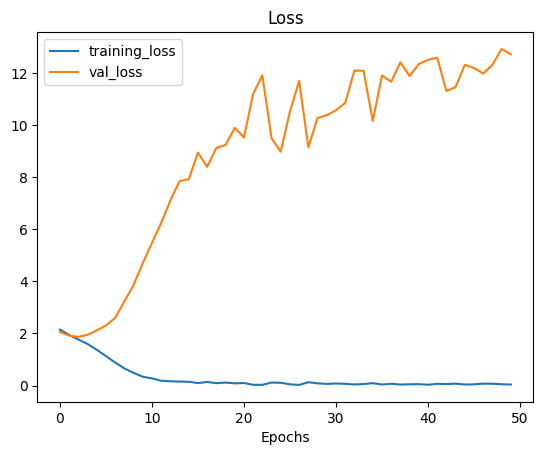

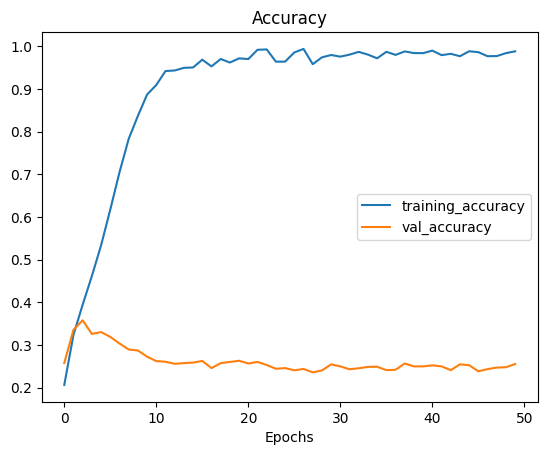

In [ ]:
from helper_functions import plot_loss_curves

# Check out the models loss curves on the 10 classes
plot_loss_curves(history_1)

Expt 2: Baseline Model with Data Augmentation

In [ ]:
# Create augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # note: this is an int not a float
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [ ]:
# Clone the model (use the same architecture)
model_2 = tf.keras.models.clone_model(model_1)

# Compile the cloned model (same setup as used for model_1)
model_2.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [ ]:
# Fit the model
history_2 = model_2.fit(train_data_augmented, # use augmented data
                          epochs=50,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/50
235/235 [==============================] - 116s 467ms/step - loss: 2.2609 - accuracy: 0.1500 - val_loss: 2.0921 - val_accuracy: 0.2504
Epoch 2/50
235/235 [==============================] - 119s 508ms/step - loss: 2.1247 - accuracy: 0.2385 - val_loss: 1.9662 - val_accuracy: 0.3136
Epoch 3/50
235/235 [==============================] - 132s 559ms/step - loss: 2.0700 - accuracy: 0.2628 - val_loss: 1.9069 - val_accuracy: 0.3364
Epoch 4/50
235/235 [==============================] - 111s 474ms/step - loss: 2.0029 - accuracy: 0.2975 - val_loss: 1.8803 - val_accuracy: 0.3456
Epoch 5/50
235/235 [==============================] - 114s 485ms/step - loss: 1.9562 - accuracy: 0.3211 - val_loss: 1.7922 - val_accuracy: 0.3836
Epoch 6/50
235/235 [==============================] - 110s 468ms/step - loss: 1.9454 - accuracy: 0.3199 - val_loss: 1.8563 - val_accuracy: 0.3456
Epoch 7/50
235/235 [==============================] - 112s 479ms/step - loss: 1.8993 - accuracy: 0.3427 - val_loss: 1.7649 -

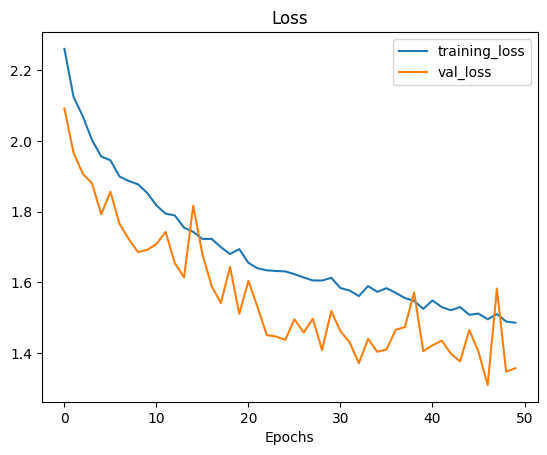

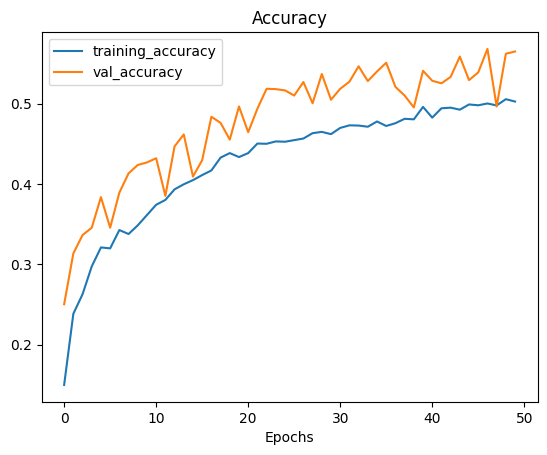

In [ ]:
# Check out our model's performance with augmented data
from helper_functions import plot_loss_curves
plot_loss_curves(history_2)

In [ ]:
# Evaluate the model

model_2.evaluate(test_data)

79/79 [==============================] - 7s 93ms/step - loss: 1.3562 - accuracy: 0.5648


[1.3561955690383911, 0.5648000240325928]

## Expt 3 : Using Transfer learning with resnet
---



In [ ]:
# Create tensorboard callback (functionized because need to create a new one for each model)
import datetime
def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers


In [ ]:
# Resnet 50 V2 feature vector
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

# Original: EfficientNetB0 feature vector (version 1)
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

# # New: EfficientNetB0 feature vector (version 2)
# efficientnet_url = "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2"



In [ ]:
def create_model(model_url, num_classes=10):
  """Takes a TensorFlow Hub URL and creates a Keras Sequential model with it.

  Args:
    model_url (str): A TensorFlow Hub feature extraction URL.
    num_classes (int): Number of output neurons in output layer,
      should be equal to number of target classes, default 10.

  Returns:
    An uncompiled Keras Sequential model with model_url as feature
    extractor layer and Dense output layer with num_classes outputs.
  """
  # Download the pretrained model and save it as a Keras layer
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False, # freeze the underlying patterns
                                           name='feature_extraction_layer',
                                           input_shape= (224,224,3,)) # define the input image shape

  # Create our own model
  model = tf.keras.Sequential([
    feature_extractor_layer, # use the feature extraction layer as the base
    layers.Dense(num_classes, activation='softmax', name='output_layer') # create our own output layer
  ])

  return model

In [ ]:

# Create model
resnet_model = create_model(resnet_url, num_classes=train_data.num_classes)

# Compile
resnet_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

In [ ]:
# Fit the model
resnet_history = resnet_model.fit(train_data,
                                  epochs=25,
                                  steps_per_epoch=len(train_data),
                                  validation_data=test_data,
                                  validation_steps=len(test_data),
                                  # Add TensorBoard callback to model (callbacks parameter takes a list)
                                  callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", # save experiment logs here
                                                                         experiment_name="resnet50V2")]) # name of log files


Saving TensorBoard log files to: tensorflow_hub/resnet50V2/20240423-184029
Epoch 1/25
235/235 [==============================] - 42s 160ms/step - loss: 0.8960 - accuracy: 0.7080 - val_loss: 0.5306 - val_accuracy: 0.8220
Epoch 2/25
235/235 [==============================] - 38s 163ms/step - loss: 0.5332 - accuracy: 0.8231 - val_loss: 0.4923 - val_accuracy: 0.8344
Epoch 3/25
235/235 [==============================] - 34s 144ms/step - loss: 0.4318 - accuracy: 0.8584 - val_loss: 0.4886 - val_accuracy: 0.8304
Epoch 4/25
235/235 [==============================] - 35s 148ms/step - loss: 0.3660 - accuracy: 0.8835 - val_loss: 0.4838 - val_accuracy: 0.8344
Epoch 5/25
235/235 [==============================] - 36s 153ms/step - loss: 0.3176 - accuracy: 0.9016 - val_loss: 0.4838 - val_accuracy: 0.8412
Epoch 6/25
235/235 [==============================] - 36s 153ms/step - loss: 0.2790 - accuracy: 0.9143 - val_loss: 0.4745 - val_accuracy: 0.8380
Epoch 7/25
235/235 [==============================] - 3

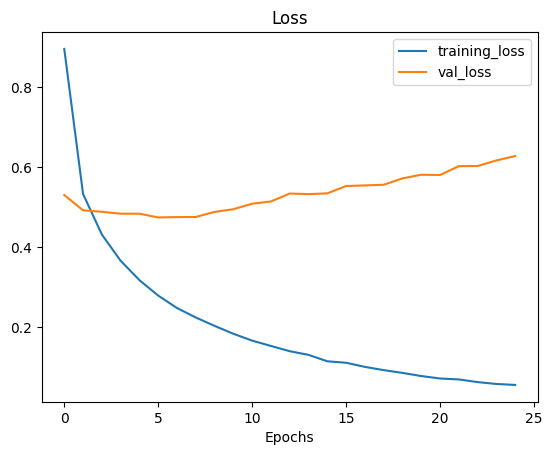

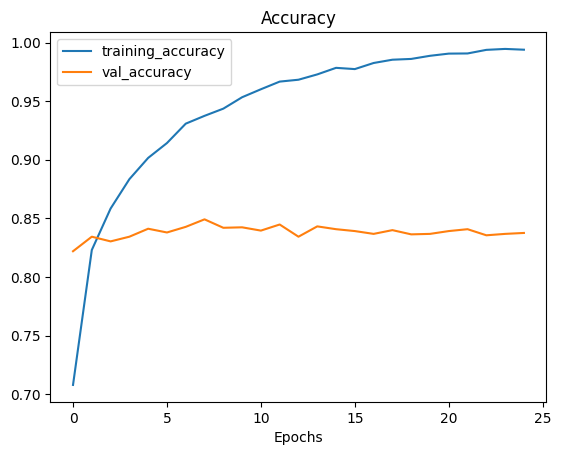

In [ ]:

plot_loss_curves(resnet_history)

In [ ]:
# Evaluate the model
resnet_model.evaluate(test_data)

79/79 [==============================] - 9s 107ms/step - loss: 0.6280 - accuracy: 0.8376


[0.6280450820922852, 0.8375999927520752]

In [ ]:

# Resnet summary
resnet_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (  (None, 2048)              23564800  
 KerasLayer)                                                     
                                                                 
 output_layer (Dense)        (None, 10)                20490     
                                                                 
Total params: 23585290 (89.97 MB)
Trainable params: 20490 (80.04 KB)
Non-trainable params: 23564800 (89.89 MB)
_________________________________________________________________


## Expt 4: Transfer learning with EfficientNet

In [ ]:
# Create model
efficientnet_model = create_model(model_url=efficientnet_url, # use EfficientNetB0 TensorFlow Hub URL
                                  num_classes=train_data.num_classes)

# Compile EfficientNet model
efficientnet_model.compile(loss='categorical_crossentropy',
                           optimizer=tf.keras.optimizers.Adam(),
                           metrics=['accuracy'])



In [ ]:
# Fit EfficientNet model
efficientnet_history = efficientnet_model.fit(train_data, # only use 10% of training data
                                              epochs=25, # train for 5 epochs
                                              steps_per_epoch=len(train_data),
                                              validation_data=test_data,
                                              validation_steps=len(test_data),
                                              callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub",
                                                                                     # Track logs under different experiment name
                                                                                     experiment_name="efficientnetB0")])


Saving TensorBoard log files to: tensorflow_hub/efficientnetB0/20240423-185654
Epoch 1/25
235/235 [==============================] - 46s 148ms/step - loss: 0.8098 - accuracy: 0.7788 - val_loss: 0.4028 - val_accuracy: 0.8892
Epoch 2/25
235/235 [==============================] - 31s 133ms/step - loss: 0.4438 - accuracy: 0.8688 - val_loss: 0.3277 - val_accuracy: 0.9044
Epoch 3/25
235/235 [==============================] - 31s 134ms/step - loss: 0.3729 - accuracy: 0.8855 - val_loss: 0.3008 - val_accuracy: 0.9076
Epoch 4/25
235/235 [==============================] - 31s 133ms/step - loss: 0.3281 - accuracy: 0.9028 - val_loss: 0.2831 - val_accuracy: 0.9120
Epoch 5/25
235/235 [==============================] - 33s 140ms/step - loss: 0.2962 - accuracy: 0.9115 - val_loss: 0.2773 - val_accuracy: 0.9120
Epoch 6/25
235/235 [==============================] - 32s 137ms/step - loss: 0.2700 - accuracy: 0.9211 - val_loss: 0.2665 - val_accuracy: 0.9120
Epoch 7/25
235/235 [==============================]

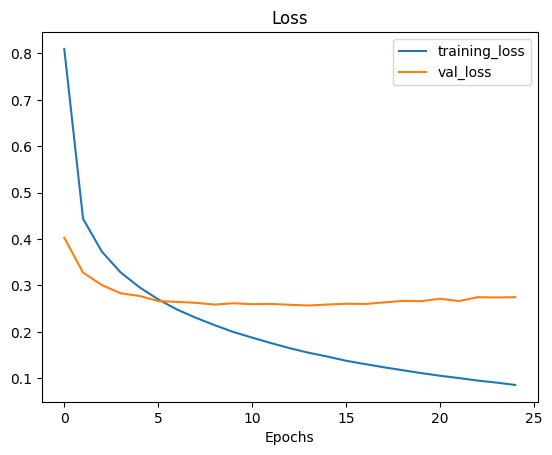

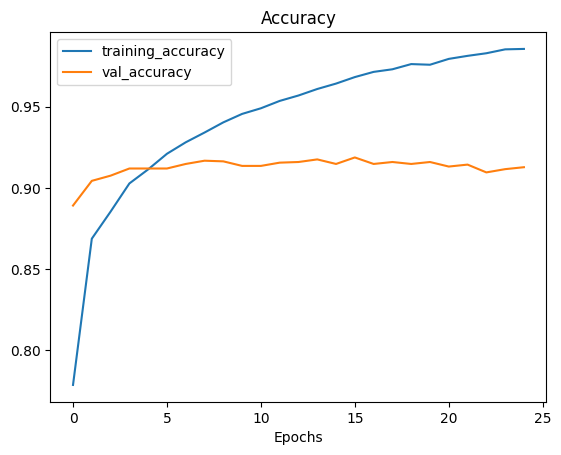

In [ ]:
plot_loss_curves(efficientnet_history)

In [ ]:
# Evaluate the model

efficientnet_model.evaluate(test_data)

79/79 [==============================] - 9s 109ms/step - loss: 0.2747 - accuracy: 0.9128


[0.2747413218021393, 0.9128000140190125]

In [ ]:
efficientnet_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (  (None, 1280)              4049564   
 KerasLayer)                                                     
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4062374 (15.50 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 4049564 (15.45 MB)
_________________________________________________________________


## Expt 5: Machine learning with SVM

In [ ]:
#Importing relevant libraries
import os
import pickle

from skimage.io import imread
from skimage.transform import resize
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score



In [ ]:
# # prepare data
# input_dir = '/home/phillip/Desktop/todays_tutorial/19_parking_car_counter/code/clf-data'
# categories = ['empty', 'not_empty']

# data = []
# labels = []
# for category_idx, category in enumerate(categories):
#     for file in os.listdir(os.path.join(input_dir, category)):
#         img_path = os.path.join(input_dir, category, file)
#         img = imread(img_path)
#         img = resize(img, (15, 15))
#         data.append(img.flatten())
#         labels.append(category_idx)

# data = np.asarray(data)
# labels = np.asarray(labels)



In [ ]:
# train / test split
# x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, shuffle=True, stratify=labels)



In [ ]:
# Define categories
categories = sorted(os.listdir(train_dir))

# Initialize lists for data and labels
train_data = []
train_labels = []
test_data = []
test_labels = []

# Load train data
for category_idx, category in enumerate(categories):
    category_train_dir = os.path.join(train_dir, category)
    for file in os.listdir(category_train_dir):
        img_path = os.path.join(category_train_dir, file)
        img = imread(img_path)
        img = resize(img, (224, 224,3))
        train_data.append(img.flatten())
        train_labels.append(category_idx)

# Load test data
for category_idx, category in enumerate(categories):
    category_test_dir = os.path.join(test_dir, category)
    for file in os.listdir(category_test_dir):
        img_path = os.path.join(category_test_dir, file)
        img = imread(img_path)
        img = resize(img, (224, 224,3))
        test_data.append(img.flatten())
        test_labels.append(category_idx)

# Convert lists to numpy arrays
x_train = np.asarray(train_data)
y_train = np.asarray(train_labels)
x_test = np.asarray(test_data)
y_test = np.asarray(test_labels)


/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))


In [ ]:
# train classifier
classifier = SVC()

parameters = [{'gamma': [0.01, 0.001, 0.0001], 'C': [1, 10, 100, 1000]}]

grid_search = GridSearchCV(classifier, parameters)

grid_search.fit(x_train, y_train)



In [ ]:
# test performance
best_estimator = grid_search.best_estimator_

y_prediction = best_estimator.predict(x_test)

score = accuracy_score(y_prediction, y_test)

print('{}% of samples were correctly classified'.format(str(score * 100)))



In [ ]:
# save model
pickle.dump(best_estimator, open('./model.p', 'wb'))

## Experiment 6: Baseline with hyperparameter tuning

In [ ]:
def build_model(hp):
  model = keras.Sequential([
    Conv2D(filters=hp.Int('conv_1_filter', min_value=16, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(224,224,3)
    ),
    Conv2D(filters=hp.Int('conv_2_filter', min_value=16, max_value=128, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    MaxPool2D(),
    Conv2D(filters=hp.Int('conv_3_filter', min_value=16, max_value=128, step=16),
        kernel_size=hp.Choice('conv_3_kernel', values = [3,5]),
        activation='relu'
    ),
    Conv2D(filters=hp.Int('conv_4_filter', min_value=16, max_value=128, step=16),
        kernel_size=hp.Choice('conv_4_kernel', values = [3,5]),
        activation='relu'
    ),
    MaxPool2D(),
    Conv2D(filters=hp.Int('conv_5_filter', min_value=16, max_value=128, step=16),
        kernel_size=hp.Choice('conv_5_kernel', values = [3,5]),
        activation='relu',
        input_shape=(224,224,3)
    ),
    Conv2D(filters=hp.Int('conv_6_filter', min_value=16, max_value=128, step=16),
        kernel_size=hp.Choice('conv_6_kernel', values = [3,5]),
        activation='relu'
    ),
    MaxPool2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='softmax')
  ])


  model.compile(optimizer=tf.keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

  return model

In [ ]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [ ]:
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=10,directory='output',project_name="Baseline with hyperparameter tuning")

In [ ]:

tuner_search.search(train_data,
                    epochs = 3,
                    steps_per_epoch = len (train_data),
                    validation_data = test_data,
                    validation_steps = len(test_data))

## Expt 7: Baseline with Augmentation and HyperParameter Tuning:

In [ ]:
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=10,directory='output',project_name="Baseline with hyperparameter tuning")

In [ ]:

tuner_search.search(train_data_augmented,
                    epochs = 3,
                    steps_per_epoch = len (train_data_augmented),
                    validation_data = test_data,
                    validation_steps = len(test_data))

# Visualising Predictions

In [ ]:

def load_and_prep_image(filename, img_shape=224, scale=True):
  """
  Reads in an image from filename, turns it into a tensor and reshapes into
  (224, 224, 3).

  Parameters
  ----------
  filename (str): string filename of target image
  img_shape (int): size to resize target image to, default 224
  scale (bool): whether to scale pixel values to range(0, 1), default True
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode it into a tensor
  img = tf.io.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])
  if scale:
    # Rescale the image (get all values between 0 and 1)
    return img/255.
  else:
    return img

1/1 [==============================] - 0s 23ms/step


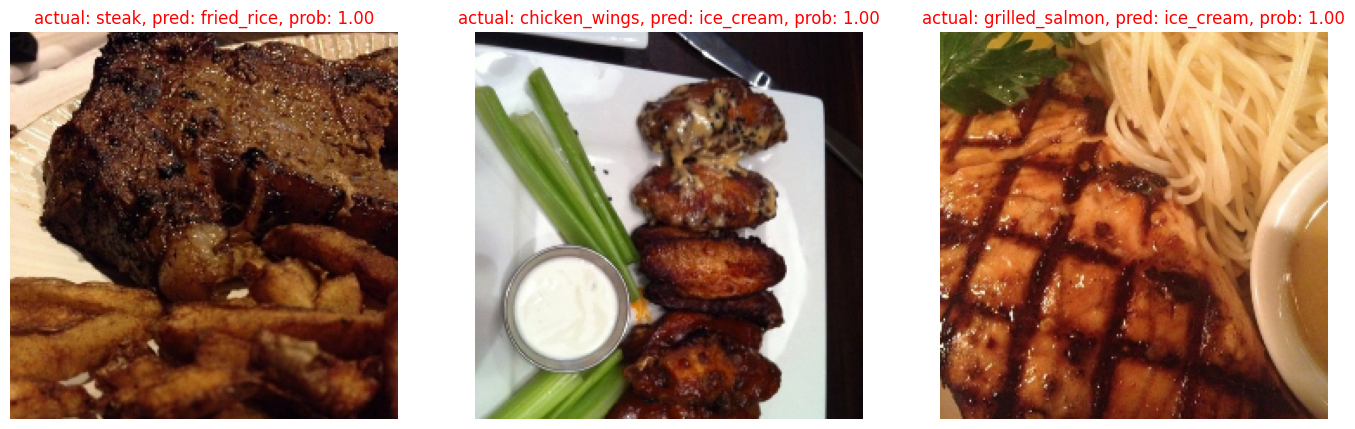

In [ ]:
# Make preds on a series of random images
import os
import random
import matplotlib.pyplot as plt

plt.figure(figsize=(17, 10))
for i in range(3):
  # Choose a random image from a random class
  class_name = random.choice(class_names_1)
  filename = random.choice(os.listdir(test_dir + class_name))
  filepath = test_dir + class_name + "/" + filename

  # Load the image and make predictions
  img = load_and_prep_image(filepath, scale=False) # don't scale images for EfficientNet predictions
  pred_prob = efficientnet_model.predict(tf.expand_dims(img, axis=0)) # model accepts tensors of shape [None, 224, 224, 3]
  pred_class = class_names_1[pred_prob.argmax()] # find the predicted class

  # Plot the image(s)
  plt.subplot(1, 3, i+1)
  plt.imshow(img)
  if class_name == pred_class: # Change the color of text based on whether prediction is right or wrong
    title_color = "g"
  else:
    title_color = "r"
  plt.title(f"actual: {class_name}, pred: {pred_class}, prob: {pred_prob.max():.2f}", c=title_color)
  plt.axis(False);